In [1]:
import numpy as np
import torch
import scipy as sp

In [2]:
import scipy
scipy.__version__

'1.9.1'

In [24]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def int_f(ff, dx=0.001):
    x=np.arange(-5, 5, dx)
    y = ff(x)
    return np.trapz(y, x=x)

def fit(true_func, fit_func, params_true, range_=5, dx=0.1, p0=None, plot=False, log_=False):
    x = np.arange(-range_,range_,dx)
    y=[]
    if not log_: 
        for b in x:
            y.append(int_f(true_func(b, *params_true)))
    else:
        for b in x:
            y.append(np.log(int_f(true_func(b, *params_true))))
    if p0 is None:
        popt, pcov = curve_fit(fit_func, x, y, maxfev = 1000000)
    else:
        popt, pcov = curve_fit(fit_func, x, y, p0, maxfev = 1000000)
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    y_diff = np.abs(fit_func(x, *popt)- y)
    y_diff_rel = np.abs(fit_func(x, *popt)- y)/y

    if plot:
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))

        ax1.plot(x, fit_func(x, *popt), 'r-',
                label=f'fit: {popt}')
        ax1.plot(x, y, 'b.',
                label=f'real')
        #ax2.set_ylim(0,2)
        ax2.plot(x, y_diff,
                label='diff')
        ax3.plot(x, y_diff_rel,
                label='diff rel')
        ax1.legend()
        ax2.legend()
        ax3.legend()
        for pp in popt:
            print(f"param {pp:.2}")
    return popt, pcov, y_diff, y_diff_rel

def plot_curve(true_func, params_true, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(int_f(true_func(b, *params_true)))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'real')
def plot_fit(fit_funct, params, range=5, dx=0.1):
    fig, ax1 = plt.subplots(1, 1, figsize=(8,5))
    x = np.arange(-range,range,dx)
    y=[]
    for b in x:
        y.append(fit_funct(b, *params))
    #plt.plot(x, 1.7*np.log(np.cosh(x))+0.4)
    ax1.plot(x, y, 'b.',
            label=f'fit_func')




In [29]:
from scipy.special import log_expit, expit

#funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_rs(h, q0=1, beta=1, JJ=0.01):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0) * funct_int(beta*(JJ+beta*x+h))
    return f_

def f_rs_approx(x, a, b, c, d):
    return a + b * funct_int(c*x+d)
#def f_rs_approx1(x, b, c, d):
#    return b * funct_int(c*x+d)

#funct_int = lambda x: np.log(np.cosh(x))
funct_int = lambda x: log_expit(x)

def f_1rsb_1(h, q0=1, beta=1, JJ=0.0, m=1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0 + m*beta*beta*x - m * funct_int(2*beta*(JJ+beta*x+h)))
    return f_
def f_1rsb_1approx(x, b0, w0, b1, w1, b2, w2):
    return b0 + w0 * log_expit(b1 + w1 * log_expit(w2*x+b2))

def f_1rsb(h, q0=0.5, q1=0.6,  beta=1, JJ=0.01, m=1, a=-1):
    def f_(x):
        return 1/np.sqrt(2*np.pi*q0) * np.exp(-((x)**2)/q0) * np.log(int_f(f_10rsb(h+x, q0=min(q1-q0,0.9999), beta=beta, JJ=JJ, m=m)))
    return f_

def f_10rsb_approx(x, b0, w0, b1, w1, b2, w2):
    return b0 + w0 * log_expit(b1 + w1 * log_expit(w2*x+b2))


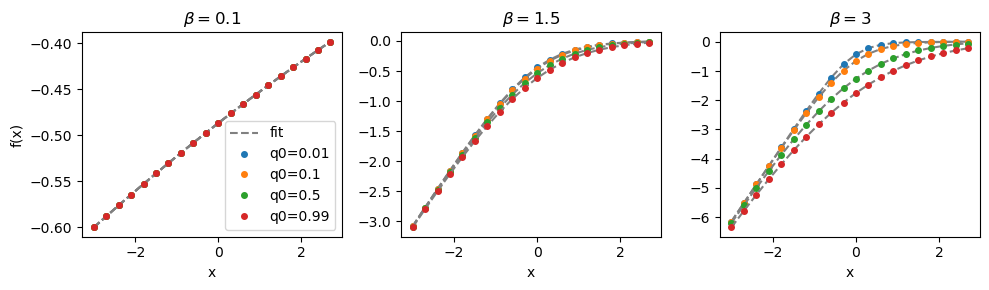

In [97]:
fig, axs = plt.subplots(1, 3, figsize=(10,3))

q0=0.01
JJ=0.1
beta=1
true_func = f_rs
fit_func = f_rs_approx
range_=3
dx=0.3
x = np.arange(-range_,range_,dx)
for i, beta in enumerate([0.1, 1.5, 3]):
        for ii, q0 in enumerate([0.01, 0.1, 0.5 ,0.99]):
                params_true = [q0,beta,JJ]
                popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, p0=[0.1, q0,beta,JJ], plot=False, range_=range_, dx=dx)
                y=[]
                for b in x:
                        y.append(int_f(true_func(b, *params_true)))

                        #label=f'fit: {popt}')
                if ii==0:
                        axs[i].plot(x, fit_func(x, *popt), '--',c="grey", label=f'fit')
                else:
                        axs[i].plot(x, fit_func(x, *popt), '--',c="grey",)
                axs[i].plot(x, y,".", label=f'q0={q0}', markersize=8, )
                axs[i].set_title(r"$\beta=$"+f"{beta}")
                axs[i].set_xlabel(f"x")
# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
axs[0].legend()
axs[0].set_ylabel("f(x)")
#axs[1].legend()
#axs[2].legend()
plt.tight_layout()

plt.savefig("fit_rs.pdf")


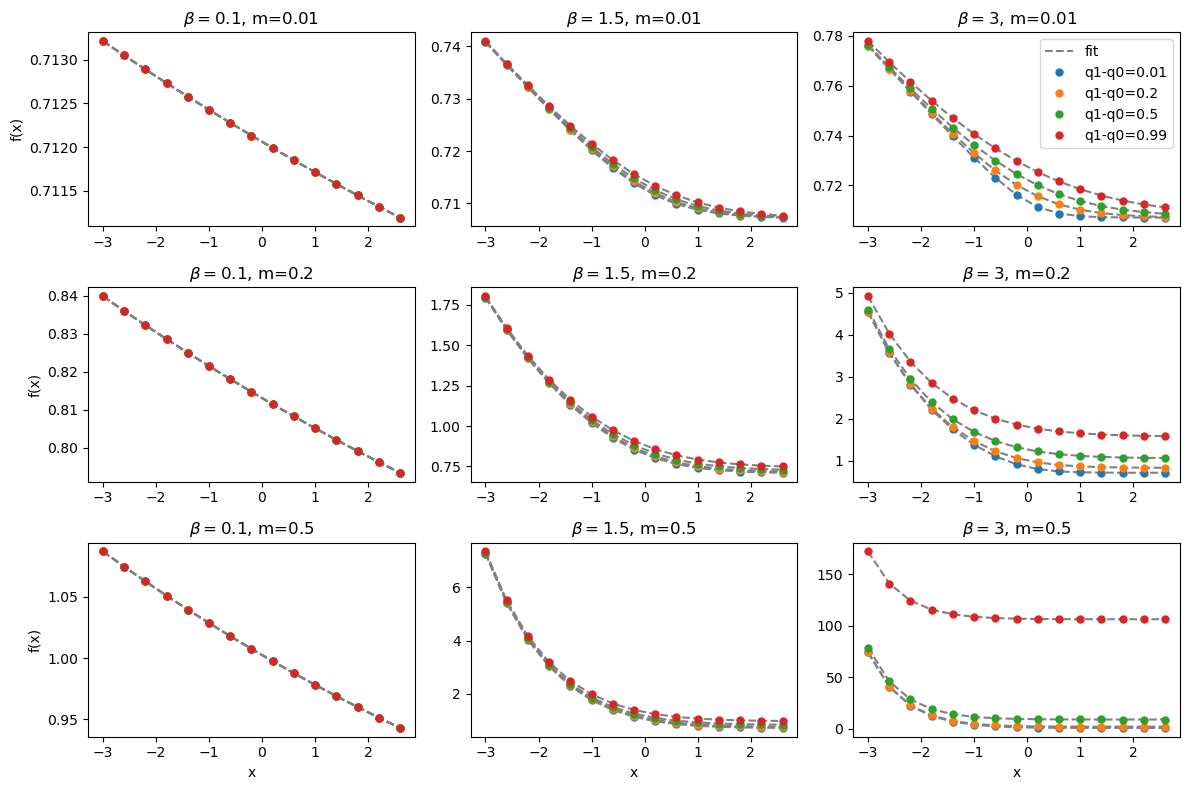

In [93]:

q0=0.01
JJ=-0.1
beta=1
true_func = f_1rsb_1
fit_func = f_1rsb_1approx
range_=3
dx=0.4
x = np.arange(-range_,range_,dx)
m=0.5
betas = [0.1, 1.5, 3]
q0s = [0.01, 0.2, 0.5, 0.99]
ms=[0.01, 0.2 , 0.5]
fig, axs = plt.subplots(len(ms), len(betas), figsize=(12,8))

for i, beta in enumerate(betas):
        for ii, q0 in enumerate(q0s):
                for iii, m in enumerate(ms):
                        params_true = p0=[q0,beta,JJ, m]
                        popt, pcov, y_diff, y_diff_rel = fit(true_func, fit_func, params_true, plot=False, range_=range_, dx=dx, p0=[0, 0, 1, m, 1, 1])
                        y=[]
                        for b in x:
                                y.append(int_f(true_func(b, *params_true)))

                                #label=f'fit: {popt}')
                        if ii==0:
                                axs[iii][i].plot(x, fit_func(x, *popt), '--',c="grey", label=f'fit')
                        else:
                                axs[iii][i].plot(x, fit_func(x, *popt), '--',c="grey")
for i, beta in enumerate(betas):
        for ii, q0 in enumerate(q0s):
                for iii, m in enumerate(ms):
                        params_true = p0=[q0,beta,JJ, m]
                        y=[]
                        for b in x:
                                y.append(int_f(true_func(b, *params_true)))

                                #label=f'fit: {popt}')
                        axs[iii][i].plot(x, y,".", markersize=10, label=f'q1-q0={q0}')
                        axs[iii][i].set_title(r"$\beta=$"+f"{beta}, m={m}")

# #ax2.set_ylim(0,2)
# ax2.plot(x, y_diff,
#         label='diff')
# ax3.plot(x, y_diff_rel,
#         label='diff rel')
#axs[0][0].legend(loc=(3.4,0.1))
#axs[1][0].legend()
axs[0][-1].legend()
axs[-1][0].set_xlabel(f"x")
axs[-1][1].set_xlabel(f"x")
axs[-1][2].set_xlabel(f"x")
axs[0][0].set_ylabel(f"f(x)")
axs[1][0].set_ylabel(f"f(x)")
axs[2][0].set_ylabel(f"f(x)")

plt.tight_layout()
plt.savefig("fit_1rsb.pdf")
